In [1]:
import pandas as pd
from plotnine import *
import os
import functools
import re
import seaborn as sns


In [101]:
path = "/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/bulkSimulations/data/EGAD/pbmc_sc_with_metadata_cpm_pc.h5ad"

In [102]:
lopaths = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

print(lopaths )

lodfs = [pd.read_csv(f"{path}/{df}", sep = ",", index_col=0) for df in lopaths]




['simulated_ss2000_var1_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.06_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.02_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.9_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.085_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.075_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.1_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.045_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.07_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.025_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.015_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss2000_var0.5_nsim200_bp_annotations_withGeneData_EGAD.csv', 'simulated_ss1000_var0.055_nsim200_bp_annotations_with

In [103]:
# Get the first column (auc) for each df
lodfs = [df.iloc[:,0] for df in lodfs]
lodfs[0]

GO:0002250    0.620080
GO:0007166    0.656127
GO:0045087    0.575207
GO:0009617    0.629931
GO:0006955    0.527539
                ...   
GO:0051697    0.606436
GO:0000768    0.656359
GO:0036444    0.411088
GO:1990108    0.444180
GO:0097039    0.789711
Name: auc, Length: 2360, dtype: float64

In [104]:
print(len(lodfs))

31


In [105]:
# Add a name to each series
lonamed_dfs = []
for i, df in enumerate(lodfs):
    df.name = lopaths[i]
    lonamed_dfs.append(df)
    
len(lonamed_dfs)

31

In [106]:
auc_merged = functools.reduce(lambda x, y: pd.merge(x,y, left_index=True, right_index=True), lonamed_dfs).reset_index()
print(auc_merged.shape)
auc_merged


(2360, 32)


,index,simulated_ss2000_var1_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.06_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.02_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.9_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.085_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.075_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.1_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.045_nsim200_bp_annotations_withGeneData_EGAD.csv,...,simulated_ss2000_var0.01_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.04_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.005_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.035_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.055_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.065_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.095_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss1000_var0.075_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss1000_var0.045_nsim200_bp_annotations_withGeneData_EGAD.csv,simulated_ss2000_var0.08_nsim200_bp_annotations_withGeneData_EGAD.csv
0,GO:0002250,0.620080,0.587306,0.556131,0.675734,0.477303,0.579895,0.581512,0.570169,0.523400,...,0.526704,0.587183,0.524816,0.530187,0.538410,0.536636,0.571183,0.543832,0.578631,0.586144
1,GO:0007166,0.656127,0.598172,0.560328,0.607501,0.511333,0.593575,0.646050,0.594745,0.610298,...,0.525400,0.615939,0.543281,0.591898,0.621519,0.569891,0.606071,0.536663,0.560024,0.595738
2,GO:0045087,0.575207,0.561656,0.532294,0.568396,0.492779,0.564022,0.578969,0.563195,0.558740,...,0.535152,0.568816,0.516035,0.557451,0.565583,0.570756,0.572843,0.577932,0.533012,0.563689
3,GO:0009617,0.629931,0.614681,0.577423,0.660204,0.501588,0.596663,0.632649,0.565787,0.571828,...,0.524785,0.535309,0.494939,0.579539,0.563535,0.585383,0.624232,0.547474,0.560789,0.586166
4,GO:0006955,0.527539,0.543296,0.525710,0.559319,0.521243,0.544671,0.540199,0.501880,0.524166,...,0.521956,0.562814,0.500855,0.528565,0.498826,0.524156,0.537078,0.513927,0.515323,0.524146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,GO:0051697,0.606436,0.604625,0.741615,0.577170,0.514194,0.617390,0.684526,0.678158,0.656364,...,0.242535,0.517619,0.634768,0.811214,0.819054,0.580312,0.601398,0.535818,0.512241,0.659336
2356,GO:0000768,0.656359,0.583357,0.691186,0.647607,0.495183,0.545812,0.563896,0.582795,0.677376,...,0.512180,0.666364,0.600574,0.576014,0.562581,0.581458,0.571897,0.601215,0.644541,0.642143
2357,GO:0036444,0.411088,0.520217,0.332540,0.536801,0.753228,0.594358,0.413023,0.532516,0.626732,...,0.445577,0.321762,0.748169,0.503945,0.532459,0.620446,0.593735,0.650451,0.550478,0.669460
2358,GO:1990108,0.444180,0.196847,0.682910,0.339050,0.450038,0.162436,0.433597,0.328862,0.573280,...,0.389988,0.159436,0.188584,0.588901,0.278575,0.558282,0.264652,0.393242,0.561706,0.391686


In [107]:
auc_long = pd.melt(auc_merged, id_vars = ["index"])
auc_long.variable.unique()

array(['simulated_ss2000_var1_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.06_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.02_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.9_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.085_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.075_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.1_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.045_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.07_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.025_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.015_nsim200_bp_annotations_withGeneData_EGAD.csv',
       'simulated_ss2000_var0.5_nsim200_bp_

In [108]:
def getVariance(name:str) -> float:
    """ 
    Recover the variance from the dataframe name
    """
    
    # Use regular expression to extract the numeric value after "var"
    pattern = r'var(\d+(\.\d+)?)'
    
    matches = re.search(pattern, name)


    if matches:    
        #print(matches.group())
        numeric_value = float(matches.group(1))
        return numeric_value
    else:
        print(name)
        


In [109]:
# Extract the variances
lovariances = []

for name in auc_long.variable:
    
    variance = float(getVariance(str(name)))
    lovariances.append(variance)
    
set(lovariances)

{0.0,
 0.005,
 0.01,
 0.015,
 0.02,
 0.025,
 0.03,
 0.035,
 0.04,
 0.045,
 0.05,
 0.055,
 0.06,
 0.065,
 0.07,
 0.075,
 0.08,
 0.085,
 0.09,
 0.095,
 0.1,
 0.3,
 0.5,
 0.7,
 0.9,
 1.0}

In [110]:
print(auc_long.variable)

0        simulated_ss2000_var1_nsim200_bp_annotations_w...
1        simulated_ss2000_var1_nsim200_bp_annotations_w...
2        simulated_ss2000_var1_nsim200_bp_annotations_w...
3        simulated_ss2000_var1_nsim200_bp_annotations_w...
4        simulated_ss2000_var1_nsim200_bp_annotations_w...
                               ...                        
73155    simulated_ss2000_var0.08_nsim200_bp_annotation...
73156    simulated_ss2000_var0.08_nsim200_bp_annotation...
73157    simulated_ss2000_var0.08_nsim200_bp_annotation...
73158    simulated_ss2000_var0.08_nsim200_bp_annotation...
73159    simulated_ss2000_var0.08_nsim200_bp_annotation...
Name: variable, Length: 73160, dtype: object


In [111]:
auc_long['variance'] = lovariances
auc_long

,index,variable,value,variance
0,GO:0002250,simulated_ss2000_var1_nsim200_bp_annotations_w...,0.620080,1.00
1,GO:0007166,simulated_ss2000_var1_nsim200_bp_annotations_w...,0.656127,1.00
2,GO:0045087,simulated_ss2000_var1_nsim200_bp_annotations_w...,0.575207,1.00
3,GO:0009617,simulated_ss2000_var1_nsim200_bp_annotations_w...,0.629931,1.00
4,GO:0006955,simulated_ss2000_var1_nsim200_bp_annotations_w...,0.527539,1.00
...,...,...,...,...
73155,GO:0051697,simulated_ss2000_var0.08_nsim200_bp_annotation...,0.659336,0.08
73156,GO:0000768,simulated_ss2000_var0.08_nsim200_bp_annotation...,0.642143,0.08
73157,GO:0036444,simulated_ss2000_var0.08_nsim200_bp_annotation...,0.669460,0.08
73158,GO:1990108,simulated_ss2000_var0.08_nsim200_bp_annotation...,0.391686,0.08


In [112]:
grouped_avg = auc_long.groupby('variance')['value'].mean().reset_index()
grouped_avg

,variance,value
0,0.000,0.494992
1,0.005,0.499860
2,0.010,0.503925
3,0.015,0.507941
4,0.020,0.511528
5,0.025,0.519025
6,0.030,0.516343
7,0.035,0.518409
8,0.040,0.518669
9,0.045,0.525842


<AxesSubplot:xlabel='variance', ylabel='value'>

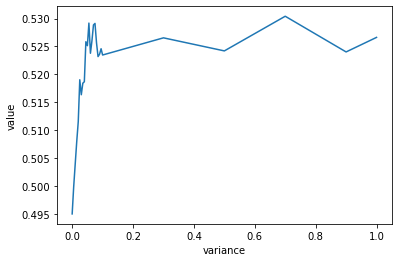

In [113]:
sns.lineplot(data = grouped_avg, x = "variance", y = "value", ylab = "AVG EGAD AUC")

In [123]:
subsample = auc_long.sort_values('index').iloc[0:200,:]
subsample

,index,variable,value,variance
1582,GO:0000002,simulated_ss1000_var0.055_nsim200_bp_annotatio...,0.421677,0.055
3942,GO:0000002,simulated_ss1000_var0.07_nsim200_bp_annotation...,0.372054,0.070
8662,GO:0000002,simulated_ss1000_var0.075_nsim200_bp_annotatio...,0.378642,0.075
6302,GO:0000002,simulated_ss1000_var0.7_nsim200_bp_annotations...,0.456593,0.700
11022,GO:0000002,simulated_ss1000_var0.045_nsim200_bp_annotatio...,0.383655,0.045
...,...,...,...,...
4675,GO:0000492,simulated_ss1000_var0.07_nsim200_bp_annotation...,0.689969,0.070
7035,GO:0000492,simulated_ss1000_var0.7_nsim200_bp_annotations...,0.663845,0.700
9395,GO:0000492,simulated_ss1000_var0.075_nsim200_bp_annotatio...,0.610521,0.075
2315,GO:0000492,simulated_ss1000_var0.055_nsim200_bp_annotatio...,0.653605,0.055


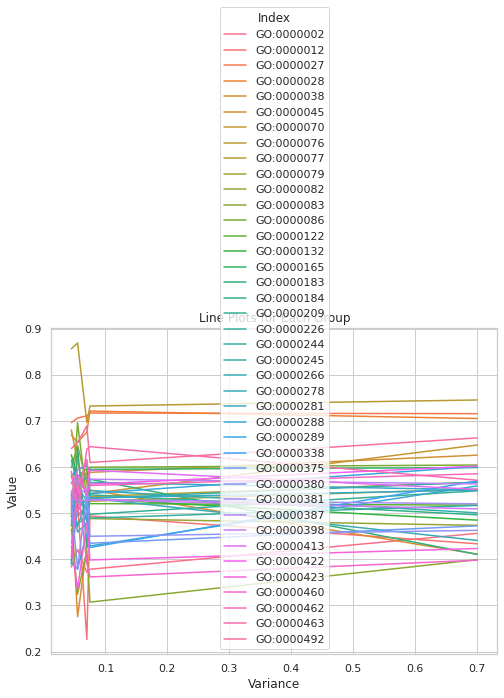

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create line plots for each group using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.lineplot(data=subsample, x='variance', y='value', hue='index')
plt.xlabel('Variance')
plt.ylabel('Value')
plt.title('Line Plots for Each Group')
plt.legend(title='Index')
plt.show()